In [4]:
import numpy as np
import random
import time

vectors1 = np.loadtxt('Sumedh.txt', delimiter=',')

def l1_distance(A1, A2):
    return np.sum(np.abs(np.array(A1) - np.array(A2)))

def l2_distance(A1, A2):
    return np.sqrt(np.sum((np.array(A1) - np.array(A2))**2))

vv=len(vectors1[0])-1

TT = vectors1[:, vv]
X1 = vectors1[:, :vv]

print("TT: ", TT)
print("X1: ", X1)

TT:  [0.084014 0.003088 0.139547 ... 0.023671 0.015644 2.20173 ]
X1:  [[ 3.00000000e+02  1.12631216e+03  0.00000000e+00 ...  0.00000000e+00
   4.47278000e-01  1.98790000e-01]
 [ 3.00000000e+02  8.49674860e+01  0.00000000e+00 ...  1.00000000e+00
   4.47278000e-01  1.98790000e-01]
 [ 3.00000000e+02  2.08399050e+01  0.00000000e+00 ...  0.00000000e+00
   6.78160000e-02  1.66080000e-02]
 ...
 [ 3.00000000e+02 -4.44359800e+00  8.32300000e+00 ...  1.00000000e+00
   8.49023000e-01  3.18383000e-01]
 [ 3.00000000e+02 -4.46173500e+00  7.05100000e+00 ...  1.00000000e+00
   8.33972000e-01  2.66871000e-01]
 [ 3.00000000e+02 -4.59557600e+00  7.93800000e+00 ...  1.00000000e+00
   8.58153000e-01  3.81401000e-01]]


In [5]:
num_wolves = 25
iterations = 65
ll = 2


num_runs = 50
TOTAL = 150
D=[0]*TOTAL

E=[0]*TOTAL

gmpfc_arr = []
time_elapsed_per_run = []

for run in range(1,num_runs+1):

      print(f"Run {run}/{num_runs}")
        
      start_time = time.time()
      
      # Initialization
      alpha_position = np.random.choice(X1.shape[0])
      beta_position = np.random.choice(X1.shape[0])
      delta_position = np.random.choice(X1.shape[0])

      alpha_score = float('-inf')
      beta_score = float('-inf')
      delta_score = float('-inf')
      FIT = []
      positions = np.random.randint(0, X1.shape[0], size=num_wolves)

      AA = []
      for i in range(len(positions)):
          AA.append(positions[i])

      counter = 1
      for iteration in range(iterations):
       for wolf in range(num_wolves):

        fitness = TT[positions[wolf]]
        if(len(AA)>=TOTAL):
            counter = 0
            break

        if((positions[wolf] in AA)==False):
              AA.append(positions[wolf])


        if fitness > alpha_score:
            delta_score = beta_score
            delta_position = beta_position

            beta_score = alpha_score
            beta_position = alpha_position

            alpha_score = fitness
            alpha_position = positions[wolf]
        elif fitness > beta_score:
            delta_score = beta_score
            delta_position = beta_position

            beta_score = fitness
            beta_position = positions[wolf]
        elif fitness > delta_score:
            delta_score = fitness
            delta_position = positions[wolf]


       a = ll - iteration * (ll / iterations)

       for wolf in range(num_wolves):
        r1 = np.random.rand()
        r2 = np.random.rand()

        A1 = ll * a * r1 - a
        C1 = ll * r2

        D_alpha = abs(C1 * X1[alpha_position] - X1[positions[wolf]])
        X1_alpha = X1[alpha_position] - A1 * D_alpha

        r1 = np.random.rand()
        r2 = np.random.rand()

        A2 = ll * a * r1 - a
        C2 = ll * r2

        D_beta = abs(C2 * X1[beta_position] - X1[positions[wolf]])
        X1_beta = X1[beta_position] - A2 * D_beta

        r1 = np.random.rand()
        r2 = np.random.rand()

        A3 = ll * a * r1 - a
        C3 = ll * r2

        D_delta = abs(C3 * X1[delta_position] - X1[positions[wolf]])
        X1_delta = X1[delta_position] - A3 * D_delta
        new_position = (X1_alpha + X1_beta + X1_delta)/3
        positions[wolf] = np.argmin(np.linalg.norm(X1 - new_position, axis=1))

       if(counter==0):
          break

      a1=len(AA)-1 #If AA does not contain TOTAL number of elements, repeat last number. We can (should) take random elements also.
      for i in range(a1, TOTAL):
         AA.append(AA[a1])

      maxi = -10
      C = [0]*TOTAL
      for i in range(TOTAL):
        C[i] = max(maxi,TT[AA[i]])
        maxi = C[i]
      for i in range(TOTAL):
        D[i]=D[i]+C[i]

      for i in range(TOTAL):
         E[i]=round(D[i]/run, 3)

      gmpfc_arr.append(E)
    
      end_time = time.time()
      elapsed_time = end_time - start_time
    
      print("Run # ",  run, " completed in ", elapsed_time, " seconds!")
      time_elapsed_per_run.append(elapsed_time)
      
      print(E)
    
    
    



Run 1/50
Run #  1  completed in  4.2970123291015625  seconds!
[0.123, 0.706, 0.706, 2.883, 2.883, 6.448, 6.448, 6.448, 6.448, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 6.835, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865, 7.865,

Run #  9  completed in  30.80891442298889  seconds!
[0.949, 1.862, 2.057, 2.586, 2.925, 3.321, 3.474, 3.474, 3.79, 3.881, 3.881, 3.881, 3.881, 4.091, 4.091, 4.418, 4.82, 4.82, 4.82, 4.82, 4.82, 4.975, 5.391, 5.474, 5.474, 5.474, 5.474, 5.511, 5.585, 5.877, 5.99, 5.995, 6.054, 6.062, 6.062, 6.062, 6.634, 6.634, 6.769, 6.795, 6.803, 6.803, 6.803, 6.803, 6.803, 6.803, 6.803, 6.803, 6.857, 6.883, 6.929, 6.929, 6.929, 7.195, 7.195, 7.293, 7.293, 7.293, 7.35, 7.356, 7.356, 7.356, 7.356, 7.356, 7.356, 7.356, 7.356, 7.395, 7.395, 7.436, 7.436, 7.436, 7.436, 7.436, 7.436, 7.512, 7.512, 7.512, 7.521, 7.593, 7.593, 7.593, 7.593, 7.593, 7.593, 7.593, 7.613, 7.613, 7.613, 7.625, 7.625, 7.625, 7.628, 7.628, 7.628, 7.628, 7.679, 7.794, 7.794, 7.794, 7.794, 7.794, 7.794, 7.794, 7.833, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.988, 7.988, 7.988, 8.014, 8.014, 8.014, 8.014, 8.088, 8.088, 8.088, 8.088, 8.088, 8.088, 8.088, 8.088, 8.088, 8.103, 8.103, 8.103, 8.103, 8.103, 8.103, 8.103, 8.1

Run #  17  completed in  6.177500009536743  seconds!
[0.891, 1.511, 1.93, 2.272, 2.505, 2.989, 3.35, 3.473, 3.641, 3.689, 3.728, 3.754, 3.886, 4.006, 4.006, 4.222, 4.435, 4.435, 4.435, 4.435, 4.435, 4.535, 4.756, 4.799, 4.872, 5.023, 5.023, 5.224, 5.295, 5.449, 5.639, 5.642, 5.871, 5.875, 6.001, 6.001, 6.304, 6.316, 6.388, 6.522, 6.551, 6.551, 6.551, 6.551, 6.555, 6.584, 6.802, 6.812, 6.981, 6.995, 7.02, 7.02, 7.02, 7.198, 7.198, 7.25, 7.25, 7.25, 7.4, 7.422, 7.422, 7.426, 7.426, 7.426, 7.426, 7.426, 7.426, 7.446, 7.446, 7.468, 7.468, 7.468, 7.475, 7.475, 7.475, 7.515, 7.515, 7.515, 7.52, 7.558, 7.558, 7.558, 7.58, 7.58, 7.58, 7.58, 7.59, 7.59, 7.619, 7.626, 7.626, 7.647, 7.649, 7.649, 7.649, 7.649, 7.676, 7.736, 7.736, 7.736, 7.736, 7.736, 7.736, 7.736, 7.844, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.889, 7.889, 7.932, 7.932, 7.932, 7.945, 7.945, 7.956, 7.956, 7.995, 8.036, 8.036, 8.036, 8.036, 8.036, 8.036, 8.036, 8.036, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.04

Run #  25  completed in  8.053959369659424  seconds!
[1.179, 1.885, 2.325, 2.559, 2.816, 3.145, 3.393, 3.477, 3.864, 3.897, 4.051, 4.129, 4.373, 4.455, 4.455, 4.615, 4.861, 4.861, 4.861, 4.861, 4.922, 4.99, 5.236, 5.266, 5.315, 5.418, 5.443, 5.58, 5.638, 5.743, 5.893, 5.939, 6.111, 6.113, 6.327, 6.327, 6.532, 6.617, 6.666, 6.757, 6.777, 6.777, 6.832, 6.832, 6.834, 6.863, 7.011, 7.018, 7.133, 7.143, 7.16, 7.193, 7.245, 7.367, 7.367, 7.402, 7.402, 7.402, 7.504, 7.519, 7.519, 7.521, 7.521, 7.523, 7.523, 7.523, 7.523, 7.537, 7.537, 7.552, 7.552, 7.552, 7.557, 7.557, 7.557, 7.584, 7.619, 7.619, 7.623, 7.649, 7.649, 7.649, 7.663, 7.663, 7.663, 7.663, 7.67, 7.67, 7.69, 7.694, 7.703, 7.717, 7.719, 7.719, 7.719, 7.719, 7.737, 7.778, 7.778, 7.778, 7.778, 7.778, 7.816, 7.816, 7.89, 7.917, 7.917, 7.917, 7.917, 7.917, 7.917, 7.927, 7.927, 7.956, 7.956, 7.956, 7.965, 7.965, 7.972, 7.976, 8.013, 8.041, 8.041, 8.041, 8.041, 8.041, 8.041, 8.041, 8.041, 8.047, 8.047, 8.047, 8.047, 8.047, 8.047, 8.047, 8

Run #  33  completed in  30.87729024887085  seconds!
[1.033, 1.746, 2.106, 2.477, 2.842, 3.259, 3.482, 3.545, 3.856, 4.002, 4.176, 4.28, 4.465, 4.527, 4.527, 4.649, 4.835, 4.925, 4.931, 5.012, 5.075, 5.126, 5.312, 5.335, 5.372, 5.466, 5.485, 5.619, 5.695, 5.827, 5.94, 5.975, 6.132, 6.134, 6.296, 6.363, 6.524, 6.588, 6.625, 6.701, 6.75, 6.75, 6.791, 6.893, 6.894, 6.916, 7.038, 7.043, 7.139, 7.146, 7.176, 7.201, 7.241, 7.333, 7.333, 7.359, 7.359, 7.359, 7.437, 7.448, 7.448, 7.453, 7.453, 7.455, 7.455, 7.461, 7.461, 7.472, 7.472, 7.483, 7.483, 7.483, 7.487, 7.487, 7.499, 7.519, 7.546, 7.546, 7.548, 7.568, 7.595, 7.595, 7.606, 7.618, 7.64, 7.64, 7.645, 7.67, 7.685, 7.688, 7.694, 7.705, 7.706, 7.706, 7.716, 7.716, 7.73, 7.761, 7.761, 7.779, 7.779, 7.779, 7.808, 7.808, 7.863, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.895, 7.895, 7.917, 7.922, 7.922, 7.946, 7.946, 7.951, 7.954, 7.982, 8.003, 8.003, 8.003, 8.033, 8.059, 8.059, 8.059, 8.081, 8.085, 8.085, 8.085, 8.085, 8.085, 8.085, 8.085, 8.

Run #  41  completed in  30.834592819213867  seconds!
[0.97, 1.864, 2.162, 2.467, 3.105, 3.448, 3.627, 3.698, 3.947, 4.065, 4.274, 4.357, 4.645, 4.695, 4.695, 4.83, 4.98, 5.052, 5.058, 5.122, 5.173, 5.215, 5.371, 5.389, 5.419, 5.494, 5.51, 5.617, 5.712, 5.818, 5.934, 5.962, 6.154, 6.156, 6.286, 6.34, 6.47, 6.524, 6.602, 6.662, 6.702, 6.702, 6.747, 6.858, 6.859, 6.876, 6.974, 6.979, 7.056, 7.062, 7.086, 7.11, 7.142, 7.221, 7.245, 7.266, 7.267, 7.273, 7.356, 7.365, 7.393, 7.407, 7.407, 7.408, 7.408, 7.413, 7.413, 7.421, 7.438, 7.447, 7.447, 7.447, 7.451, 7.462, 7.475, 7.491, 7.513, 7.552, 7.554, 7.57, 7.591, 7.591, 7.602, 7.611, 7.629, 7.629, 7.633, 7.653, 7.665, 7.668, 7.673, 7.682, 7.682, 7.682, 7.69, 7.69, 7.701, 7.738, 7.738, 7.772, 7.772, 7.772, 7.799, 7.802, 7.847, 7.863, 7.865, 7.865, 7.865, 7.865, 7.865, 7.874, 7.874, 7.892, 7.895, 7.895, 7.915, 7.915, 7.946, 7.948, 7.971, 7.988, 7.997, 8.014, 8.038, 8.059, 8.059, 8.059, 8.077, 8.08, 8.08, 8.08, 8.08, 8.08, 8.084, 8.084, 8.084, 8

Run #  49  completed in  3.795781135559082  seconds!
[1.084, 1.923, 2.192, 2.447, 3.068, 3.369, 3.519, 3.651, 3.86, 4.017, 4.191, 4.344, 4.585, 4.627, 4.698, 4.896, 5.022, 5.082, 5.087, 5.141, 5.217, 5.279, 5.41, 5.425, 5.45, 5.521, 5.543, 5.662, 5.742, 5.831, 5.942, 5.966, 6.13, 6.131, 6.248, 6.293, 6.401, 6.484, 6.552, 6.614, 6.647, 6.667, 6.705, 6.797, 6.81, 6.825, 6.907, 6.91, 6.987, 7.024, 7.044, 7.064, 7.091, 7.157, 7.177, 7.195, 7.195, 7.201, 7.286, 7.294, 7.317, 7.329, 7.329, 7.33, 7.352, 7.357, 7.357, 7.364, 7.378, 7.385, 7.385, 7.389, 7.392, 7.401, 7.423, 7.453, 7.471, 7.504, 7.506, 7.519, 7.537, 7.537, 7.545, 7.553, 7.568, 7.568, 7.572, 7.59, 7.6, 7.602, 7.607, 7.614, 7.615, 7.615, 7.621, 7.621, 7.631, 7.661, 7.661, 7.69, 7.696, 7.696, 7.718, 7.721, 7.772, 7.786, 7.787, 7.787, 7.787, 7.787, 7.787, 7.795, 7.795, 7.81, 7.813, 7.813, 7.844, 7.844, 7.871, 7.872, 7.898, 7.912, 7.919, 7.933, 7.954, 7.971, 7.971, 7.971, 7.986, 8.0, 8.0, 8.0, 8.006, 8.006, 8.009, 8.009, 8.017, 8.017

NameError: name 'pickle' is not defined

In [7]:
import pickle

# Dumping this data into a .pkl file:
with open('gwo_results.pkl', 'wb') as file:
  pickle.dump({'gmpfc_arr': gmpfc_arr, 'time_elapsed_per_run': time_elapsed_per_run}, file)

In [ ]:
# Generating the arrays we will use to plot our final figures:
nb_runs = 50

y_max_mu = []
y_max_sig_bot = []
y_max_sig_top = []

for i in range(TOTAL):
    y_maxes = []
    for j in range(nb_runs):
          if( i < len(gmpfc_arr[j]) ): #only if gmpfc_arr[j] has ith iteration!
              y_maxes.append(gmpfc_arr[j][i])

    print("y_maxes for iteration ", i, ": ", y_maxes)
    y_max_mu.append( np.mean(y_maxes) )
    print("y_max_mu[i]: ", y_max_mu[i])
    print("y_maxes < y_max_mu[i]: ", y_maxes < y_max_mu[i])

    y_maxes_L_y_max_mu_i = y_maxes < y_max_mu[i]
    y_max_sig_bot_temp = []
    for k in range(len(y_maxes_L_y_max_mu_i)):
        if (y_maxes_L_y_max_mu_i[k] == True):
            y_max_sig_bot_temp.append(y_maxes[k])
    y_max_sig_bot.append( np.std ( y_max_sig_bot_temp )  )
    print(y_max_sig_bot[i])

    y_maxes_G_y_max_mu_i = y_maxes > y_max_mu[i]
    y_max_sig_top_temp = []
    for k in range(len(y_maxes_G_y_max_mu_i)):
        if (y_maxes_G_y_max_mu_i[k] == True):
            y_max_sig_top_temp.append(y_maxes[k])
    y_max_sig_top.append( np.std ( y_max_sig_top_temp )  )
    print(y_max_sig_top[i])

print("y_max_mu: ", y_max_mu)
print("y_max_sig_bot: ", y_max_sig_bot)
print("y_max_sig_top: ", y_max_sig_top)


y_maxes for iteration  0 :  [1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136, 1.136]
y_max_mu[i]:  1.1360000000000001
y_maxes < y_max_mu[i]:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
2.220446049250313e-16
nan
y_maxes for iteration  1 :  [1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 1.886, 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



8.881784197001252e-16
nan
y_maxes for iteration  43 :  [6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522, 6.522]
y_max_mu[i]:  6.521999999999999
y_maxes < y_max_mu[i]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
nan
8.881784197001252e-16
y_maxes for iteration  44 :  [6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 6.559, 

In [ ]:
np_y_max_mu = np.array(y_max_mu)
np_y_max_sig_bot = np.array(y_max_sig_bot)
np_y_max_sig_top = np.array(y_max_sig_top)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


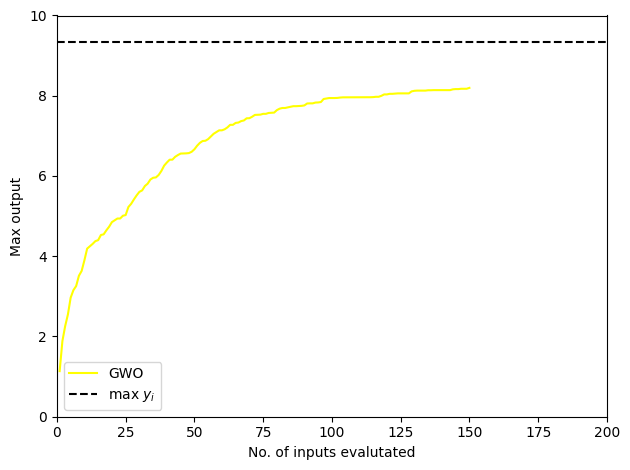

In [ ]:
x_values = np.arange(1, TOTAL + 1)
print(x_values)

plt.figure()
plt.plot(x_values, y_max_mu, label="GWO", clip_on=False, color="yellow")
plt.fill_between(TOTAL, np_y_max_mu - np_y_max_sig_bot, np_y_max_mu + np_y_max_sig_top, alpha=0.2, ec="None")

plt.xlabel('No. of inputs evalutated')
plt.ylabel('Max output')

plt.axhline(y=9.35, color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)
plt.xlim([0, 200])
plt.ylim([0, 10])
plt.legend()

plt.tight_layout()
#plt.savefig("search_efficiency_for_specific_acquisition_run.pdf")
plt.show()

In [ ]:
y1 = [0.019, 0.23, 3.599, 3.599, 3.599, 3.599, 3.599, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 3.628, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294, 7.294]
y2 = [0.278, 0.384, 2.068, 2.068, 2.094, 2.094, 2.094, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 2.108, 3.431, 3.431, 3.431, 3.431, 3.759, 4.085, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 4.29, 5.503, 5.503, 5.503, 5.503, 7.01, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.471, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.619, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 7.727, 8.023, 8.023, 8.023, 8.023, 8.023, 8.023, 8.023, 8.023, 8.023, 8.023]
y3 = [0.907, 1.182, 2.305, 2.305, 2.322, 2.322, 2.322, 2.332, 2.332, 2.332, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 4.392, 4.392, 4.392, 4.392, 4.611, 4.828, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 5.222, 5.222, 5.222, 6.031, 6.031, 6.031, 6.031, 7.036, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711]
y4 = [0.907, 1.182, 2.305, 2.305, 2.322, 2.322, 2.322, 2.332, 2.332, 2.332, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 3.51, 4.392, 4.392, 4.392, 4.392, 4.611, 4.828, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 4.964, 5.222, 5.222, 5.222, 6.031, 6.031, 6.031, 6.031, 7.036, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.343, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.442, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.514, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711]
y5 = [1.64, 2.012, 2.574, 2.574, 2.582, 2.582, 2.582, 2.729, 2.729, 2.729, 3.898, 3.898, 3.898, 4.038, 4.054, 4.184, 4.184, 4.184, 4.184, 4.184, 4.625, 4.625, 4.625, 4.625, 4.735, 4.843, 4.991, 4.991, 4.991, 4.991, 4.991, 5.023, 5.023, 5.023, 5.606, 5.606, 5.606, 6.011, 6.011, 6.039, 6.039, 6.542, 6.931, 6.931, 6.931, 6.931, 6.967, 6.967, 6.967, 6.976, 6.976, 6.976, 7.37, 7.383, 7.41, 7.41, 7.459, 7.459, 7.459, 7.459, 7.459, 7.459, 7.493, 7.493, 7.493, 7.493, 7.493, 7.493, 7.493, 7.582, 7.582, 7.582, 7.582, 7.582, 7.582, 7.582, 7.632, 7.632, 7.632, 7.632, 7.632, 7.632, 7.632, 7.678, 7.678, 7.678, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.763, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.799, 7.834, 7.834, 7.932, 7.932, 7.932, 7.932, 7.932, 8.051, 8.051, 8.051, 8.051, 8.051]
y6 = [1.406, 1.743, 2.224, 2.295, 2.63, 2.63, 2.63, 2.756, 2.756, 2.756, 3.758, 3.758, 3.758, 4.06, 4.073, 4.565, 4.565, 4.565, 4.565, 4.565, 4.943, 4.943, 4.943, 4.943, 5.036, 5.13, 5.256, 5.256, 5.256, 5.256, 5.256, 5.284, 5.284, 5.284, 5.783, 5.807, 5.807, 6.153, 6.153, 6.178, 6.178, 6.608, 6.942, 6.942, 6.942, 6.942, 6.973, 6.973, 6.973, 6.98, 6.98, 6.98, 7.318, 7.329, 7.353, 7.353, 7.395, 7.467, 7.467, 7.467, 7.467, 7.467, 7.496, 7.496, 7.496, 7.532, 7.532, 7.532, 7.532, 7.607, 7.632, 7.633, 7.633, 7.633, 7.633, 7.633, 7.677, 7.677, 7.677, 7.677, 7.677, 7.677, 7.677, 7.716, 7.716, 7.716, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.789, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.819, 7.935, 7.935, 7.935, 7.935, 7.935, 7.935, 7.935, 7.935, 7.935, 7.965, 7.965, 8.049, 8.049, 8.049, 8.049, 8.049, 8.151, 8.151, 8.151, 8.151, 8.151]
y7 = [1.292, 1.587, 2.351, 2.573, 2.866, 2.866, 2.866, 2.976, 2.976, 2.976, 3.853, 3.853, 3.853, 4.117, 4.128, 4.559, 4.559, 4.559, 4.559, 4.559, 4.889, 4.889, 4.889, 4.889, 4.971, 5.053, 5.164, 5.164, 5.164, 5.164, 5.164, 5.188, 5.188, 5.188, 5.625, 5.645, 5.645, 5.949, 5.949, 5.97, 5.97, 6.347, 6.639, 6.639, 6.639, 6.639, 6.666, 6.666, 6.666, 6.672, 6.672, 6.672, 6.968, 6.978, 6.998, 6.998, 7.248, 7.311, 7.311, 7.311, 7.311, 7.311, 7.337, 7.337, 7.337, 7.368, 7.368, 7.368, 7.368, 7.434, 7.518, 7.52, 7.52, 7.52, 7.52, 7.52, 7.558, 7.558, 7.558, 7.558, 7.558, 7.558, 7.558, 7.592, 7.592, 7.592, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.656, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.683, 7.784, 7.784, 7.784, 7.784, 7.784, 7.784, 7.784, 7.784, 7.784, 7.81, 7.81, 7.884, 7.884, 7.884, 7.884, 7.884, 7.973, 7.973, 7.973, 7.973, 7.973]
y8 = [1.437, 1.802, 2.481, 2.679, 2.94, 2.94, 2.94, 3.038, 3.392, 3.392, 4.172, 4.172, 4.172, 4.406, 4.416, 4.799, 4.799, 4.799, 4.799, 4.799, 5.093, 5.093, 5.093, 5.093, 5.165, 5.238, 5.337, 5.337, 5.337, 5.337, 5.337, 5.358, 5.397, 5.397, 5.786, 5.804, 5.804, 6.074, 6.074, 6.093, 6.093, 6.428, 6.687, 6.687, 6.687, 6.687, 6.711, 6.711, 6.711, 6.717, 6.717, 6.717, 6.98, 6.988, 7.021, 7.021, 7.244, 7.3, 7.3, 7.3, 7.3, 7.3, 7.322, 7.322, 7.322, 7.35, 7.35, 7.35, 7.35, 7.409, 7.484, 7.485, 7.485, 7.485, 7.485, 7.485, 7.519, 7.519, 7.519, 7.519, 7.595, 7.595, 7.595, 7.625, 7.625, 7.625, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.682, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.706, 7.796, 7.796, 7.796, 7.796, 7.796, 7.796, 7.796, 7.796, 7.796, 7.819, 7.819, 7.885, 7.885, 7.885, 7.885, 7.885, 7.964, 7.964, 7.964, 7.964, 7.964]
y9 = [1.353, 1.682, 2.293, 2.471, 2.869, 2.869, 2.869, 3.427, 3.746, 3.746, 4.447, 4.447, 4.447, 4.658, 4.667, 5.012, 5.012, 5.012, 5.012, 5.012, 5.276, 5.276, 5.276, 5.276, 5.342, 5.407, 5.496, 5.496, 5.496, 5.496, 5.496, 5.515, 5.551, 5.551, 5.9, 5.917, 5.917, 6.159, 6.159, 6.177, 6.177, 6.478, 6.711, 6.711, 6.804, 6.804, 6.825, 6.825, 6.825, 6.831, 6.831, 6.831, 7.067, 7.075, 7.104, 7.104, 7.304, 7.355, 7.355, 7.355, 7.355, 7.355, 7.375, 7.375, 7.375, 7.4, 7.4, 7.4, 7.4, 7.453, 7.53, 7.531, 7.531, 7.531, 7.531, 7.531, 7.561, 7.561, 7.561, 7.561, 7.63, 7.63, 7.63, 7.657, 7.657, 7.657, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.708, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.73, 7.744, 7.744, 7.811, 7.811, 7.811, 7.891, 7.891, 7.891, 7.891, 7.891, 7.891, 7.891, 7.891, 7.891, 7.912, 7.912, 7.972, 7.972, 7.972, 7.972, 7.972, 8.043, 8.043, 8.043, 8.043, 8.043]

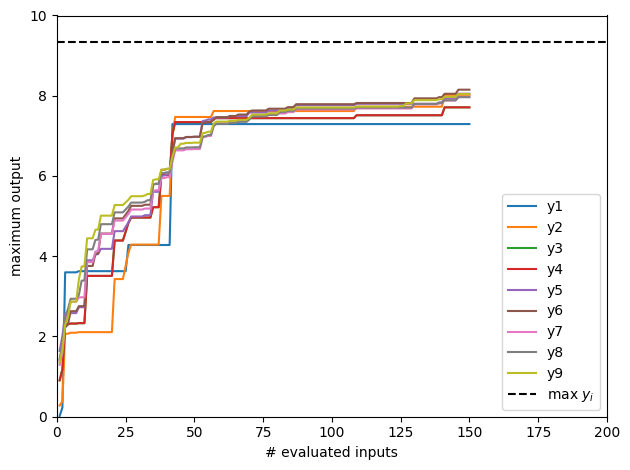

In [ ]:
import matplotlib.pyplot as plt

x1 = np.arange(1, len(y1) + 1)
x2 = np.arange(1, len(y2) + 1)
x3 = np.arange(1, len(y3) + 1)
x4 = np.arange(1, len(y4) + 1)
x5 = np.arange(1, len(y5) + 1)
x6 = np.arange(1, len(y6) + 1)
x7 = np.arange(1, len(y7) + 1)
x8 = np.arange(1, len(y8) + 1)
x9 = np.arange(1, len(y9) + 1)



plt.figure()
plt.plot(x1, y1, label="y1")
plt.plot(x2, y2, label="y2")
plt.plot(x3, y3, label="y3")
plt.plot(x4, y4, label="y4")
plt.plot(x5, y5, label="y5")
plt.plot(x6, y6, label="y6")
plt.plot(x7, y7, label="y7")
plt.plot(x8, y8, label="y8")
plt.plot(x9, y9, label="y9")
plt.xlabel('# evaluated inputs')
plt.ylabel('maximum output')

plt.axhline(y=9.35, color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)
plt.xlim([0, 200])
plt.ylim([0, 10])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
num_wolves = 25
iterations = 65
ll = 2


num_runs = 1
TOTAL = 150
D=[0]*TOTAL

E=[0]*TOTAL

gmpfc_arr = []
positions_per_iteration = []

for run in range(1,num_runs+1):

      print(f"Run {run}/{num_runs}")
      # Initialization
      alpha_position = np.random.choice(X1.shape[0])
      beta_position = np.random.choice(X1.shape[0])
      delta_position = np.random.choice(X1.shape[0])

      alpha_score = float('-inf')
      beta_score = float('-inf')
      delta_score = float('-inf')
      FIT = []
      positions = np.random.randint(0, X1.shape[0], size=num_wolves)

      AA = []
      for i in range(len(positions)):
          AA.append(positions[i])

      counter = 1
      for iteration in range(iterations):
       for wolf in range(num_wolves):

        fitness = TT[positions[wolf]]
        if(len(AA)>=TOTAL):
            counter = 0
            break

        if((positions[wolf] in AA)==False):
              AA.append(positions[wolf])


        if fitness > alpha_score:
            delta_score = beta_score
            delta_position = beta_position

            beta_score = alpha_score
            beta_position = alpha_position

            alpha_score = fitness
            alpha_position = positions[wolf]
        elif fitness > beta_score:
            delta_score = beta_score
            delta_position = beta_position

            beta_score = fitness
            beta_position = positions[wolf]
        elif fitness > delta_score:
            delta_score = fitness
            delta_position = positions[wolf]


       a = ll - iteration * (ll / iterations)
       positions_per_iteration_temp = []

       for wolf in range(num_wolves):
        r1 = np.random.rand()
        r2 = np.random.rand()

        A1 = ll * a * r1 - a
        C1 = ll * r2

        D_alpha = abs(C1 * X1[alpha_position] - X1[positions[wolf]])
        X1_alpha = X1[alpha_position] - A1 * D_alpha

        r1 = np.random.rand()
        r2 = np.random.rand()

        A2 = ll * a * r1 - a
        C2 = ll * r2

        D_beta = abs(C2 * X1[beta_position] - X1[positions[wolf]])
        X1_beta = X1[beta_position] - A2 * D_beta

        r1 = np.random.rand()
        r2 = np.random.rand()

        A3 = ll * a * r1 - a
        C3 = ll * r2

        D_delta = abs(C3 * X1[delta_position] - X1[positions[wolf]])
        X1_delta = X1[delta_position] - A3 * D_delta
        new_position = (X1_alpha + X1_beta + X1_delta)/3
        positions[wolf] = np.argmin(np.linalg.norm(X1 - new_position, axis=1))
        positions_per_iteration_temp.append(positions[wolf])


       positions_per_iteration.append(positions_per_iteration_temp)

       if(counter==0):
          break

      a1=len(AA)-1 #If AA does not contain TOTAL number of elements, repeat last number. We can (should) take random elements also.
      for i in range(a1, TOTAL):
         AA.append(AA[a1])

      maxi = -10
      C = [0]*TOTAL
      for i in range(TOTAL):
        C[i] = max(maxi,TT[AA[i]])
        maxi = C[i]
      for i in range(TOTAL):
        D[i]=D[i]+C[i]

      for i in range(TOTAL):
         E[i]=round(D[i]/run, 3)

      gmpfc_arr.append(E)
      print(E)
      print(AA)

      print("positions_per_iteration: ", positions_per_iteration)


Run 1/1
[0.105, 0.257, 0.257, 0.257, 3.973, 3.973, 3.973, 3.973, 3.973, 3.973, 3.973, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 4.404, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752, 8.752]


In [ ]:
print(len(positions_per_iteration))
print(len(positions_per_iteration[0]))

65
25


In [ ]:
# We will be implementing Recursive PSO in this notebook
import pickle
import numpy as np
import random

# Loading the database
X = pickle.load(open('input_output.pkl', 'rb'))['x']
print("shape of X:", np.shape(X))

y = pickle.load(open('input_output.pkl', 'rb'))['y']
print("shape of y:", np.shape(y))

# A function to return the index of the input in the database
def input_index(Xinput):
  for i, input in enumerate(X):
    if np.array_equal(Xinput, input):
      return y[i]
  return None

shape of X: (25877, 151)
shape of y: (25877,)


In [ ]:
!pip install SciencePlots

In [ ]:
# now, with this information, we'll try to see how it looks like on a graph, following Visualizations.ipynb
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import torch
import seaborn as sns
from sklearn.decomposition import PCA
import scienceplots

plt.matplotlib.style.use(['science','nature'])
cool_colors = ['#0A84A4', '#F6C95E', '#6F4E7C', '#9DD967', '#CB472E', '#FFA157', '#8CDCD0']

plt.rcParams.update(plt.rcParamsDefault)

search_to_color = {'BO': cool_colors[0], 'random': cool_colors[1], 'evolutionary': cool_colors[2], 'RF': cool_colors[3], 'RF (div)': cool_colors[5]}

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)

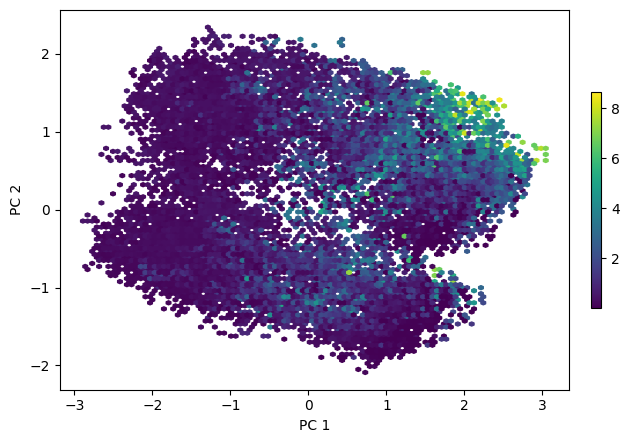

In [ ]:
plt.hexbin(X_2D[:, 0], X_2D[:, 1], C=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
cb = plt.colorbar(fraction=0.02, pad=0.04)
plt.xticks()
plt.yticks()
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig('feature_space_colored_by_DC.pdf')
plt.show()

7
current i 0
[22341, 21089, 24991, 19900, 64, 20874, 21394, 64, 18301, 19973, 25874, 15036, 10462, 20892, 3254, 23586, 18077, 4335, 17264, 19385, 21658, 13104, 16455, 18699, 11394]
current i 1
[20887, 5093, 24574, 118, 4244, 20618, 17723, 19098, 15606, 16562, 18386, 21001, 16902, 20071, 85, 16310, 18127, 22864, 18272, 15742, 17866, 19256, 22067, 85, 18662]
current i 2
[16611, 12975, 14964, 18926, 17449, 14704, 17012, 20908, 17419, 16314, 17012, 12975, 8385, 468, 16314, 19364, 12975, 118, 16314, 1970, 17098, 21694, 12975, 23266, 11394]
current i 3
[20908, 20844, 18119, 12086, 14469, 1970, 18831, 16902, 17993, 21559, 85, 18831, 17264, 17012, 7280, 20737, 18831, 18170, 17875, 15742, 21694, 12656, 19135, 12975, 16314]
current i 4
[15791, 18386, 16489, 118, 9093, 18831, 10462, 64, 11817, 21082, 15368, 17875, 19755, 12656, 17395, 16314, 16690, 15396, 13961, 16961, 21662, 17012, 17264, 17395, 16072]
current i 5
[12656, 9093, 15791, 9093, 15884, 8385, 9093, 118, 16961, 17863, 9093, 85, 14704,

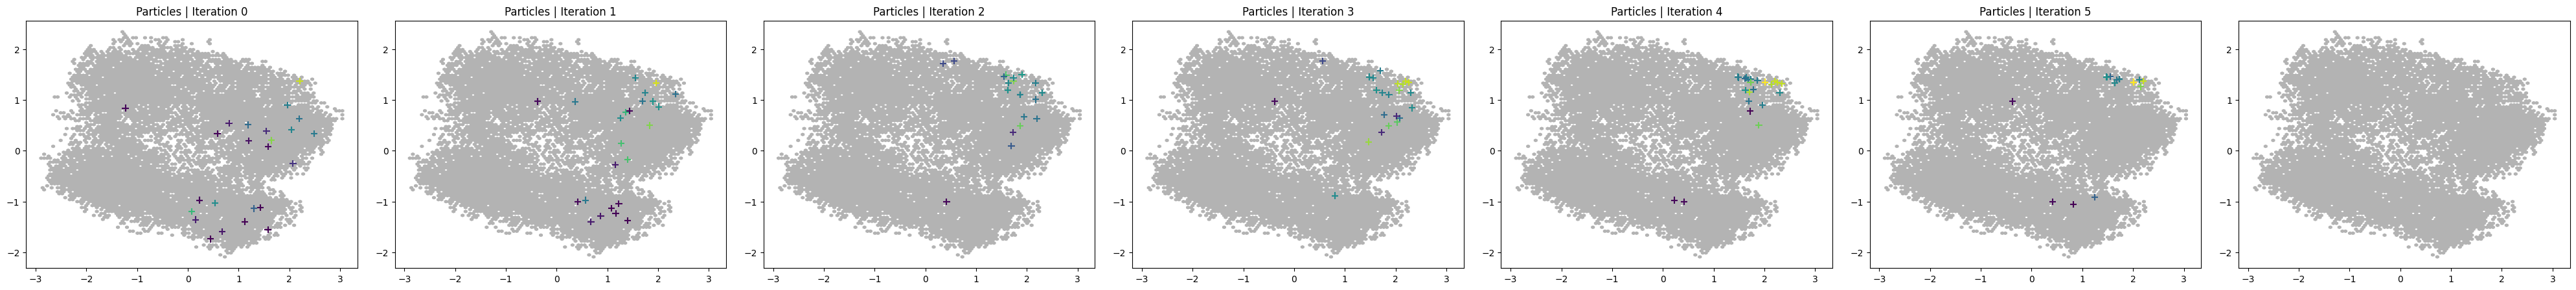

In [ ]:
print(int(len(positions_per_iteration) / 10) + 1)
fig, ax = plt.subplots(1, int(len(positions_per_iteration) / 10) + 1, figsize=(40, 40))
fig.tight_layout()

for a in ax:
    a.set_aspect('equal', 'box')
    a.hexbin(X_2D[:, 0], X_2D[:, 1], C=0.3 * np.ones(y.shape[0]), cmap="binary", vmin=0, vmax=1)

for i in range(0, int(len(positions_per_iteration) / 10)):
    print("current i", i)
    ids_acquired = [id for id in positions_per_iteration[i]]
    print(ids_acquired)
    ax[i].scatter(X_2D[ids_acquired, 0], X_2D[ids_acquired, 1], c=y[ids_acquired], marker="+", s=55, vmin=cb.vmin, vmax=cb.vmax)
    ax[i].set_title('Particles | Iteration {}'.format(i))

#plt.savefig("iterations_!.pdf", bbox_inches="tight")
plt.show()
